# Módulo 24: Simulación - Aplicación Práctica
## Simulación de Monte Carlo
- Genera miles de escenarios de modelos donde oscilan las variables
- Cada variable del modelo puede ser potencialmente una distribución de probabilidad
- Dirante el proceso de simulación las distribuciones se muestrean aleatoriamente
- De esta forma el modelo se recalcula cientos/miles de veces, generando un resultado también en forma de distribución

In [23]:
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [24]:
# Generación de muestras
print('Muestras:')
print(np.random.normal(100,10))
print(np.random.normal(100,10))
print(np.random.normal(100,10))
print(np.random.normal(100,10))
print(np.random.normal(100,10))

Muestras:
104.96714153011233
98.61735698828815
106.47688538100692
115.23029856408026
97.65846625276664


Text(0.5, 1.0, 'Muestras Aleatorias')

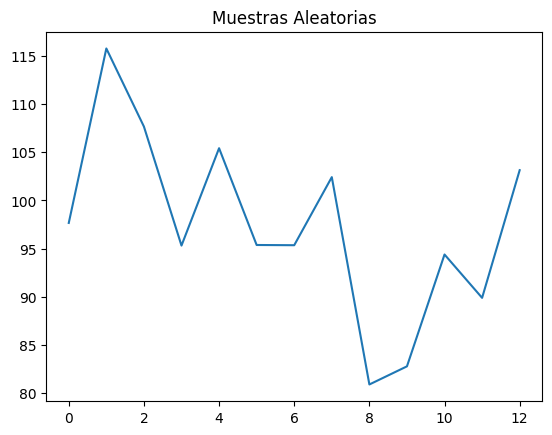

In [25]:
# Visualización de muestras
muestras = []
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))
muestras.append(np.random.normal(100,10))

# Visualización en un gráfico
plt.plot(np.arange(0,13,1).tolist(), muestras)
plt.title("Muestras Aleatorias")

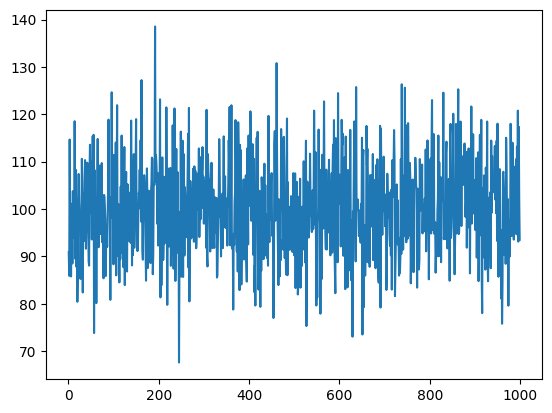

In [26]:
# Generar un array de mil muestras
muestras = []
nmuestras = 1000
for i in range (1,nmuestras):
    muestras.append(np.random.normal(100,10))

plt.plot(range(1, nmuestras), muestras)

Text(0, 0.5, 'Probability')

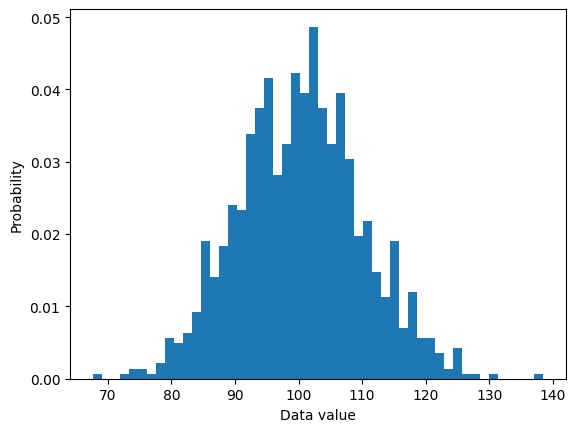

In [27]:
# Generación de un histograma del array de muestras para validar que sigió la distribución planteada (normal)
plt.hist(muestras, density=True, bins=50)
plt.xlabel('Data value')
plt.ylabel('Probability')

In [28]:
# Distribución lognormal
media = 3
sigma = 1
smp = np.random.lognormal(media,sigma,1000)

(array([0.02549646, 0.02529167, 0.01464255, 0.01064912, 0.00563175,
        0.00522217, 0.00409582, 0.00163833, 0.00153593, 0.00122875,
        0.00194551, 0.00092156, 0.00030719, 0.00061437, 0.00020479,
        0.00040958, 0.00051198, 0.00051198, 0.0001024 , 0.00020479,
        0.00020479, 0.        , 0.0001024 , 0.0001024 , 0.0001024 ,
        0.        , 0.0001024 , 0.00030719, 0.0001024 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0001024 , 0.        , 0.0001024 ]),
 array([  1.06142396,  10.82748506,  20.59354617,  30.35960727,
         40.12566837,  49.89172947,  59.65779058,  69.42385168,
         79.18991278,  88.95597388,  98.72203499, 108.48809609,
        118.25415719, 128.02021829, 137.7862794 , 147.5523405 ,
        157.3184016 , 167.0844627 , 176.85052381, 186.61658491

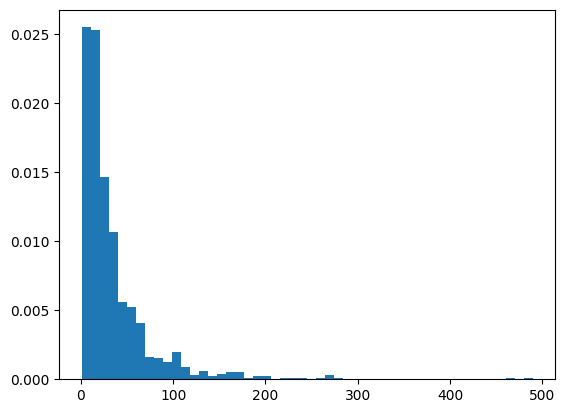

In [29]:
plt.hist(smp, density=True, bins=50, align='mid')

## Distribuciones de probabilidad

In [30]:
# Variables de configuración
num_simulations = 10000

# Variables del presupuesto
costo_estudios = 0
costo_diseno = 0
costo_ingenieria = 0
costo_implementacion = 0
costo_pruebas = 0
costo_aceptacion = 0
costo_referencia = 900

In [31]:
# Se genera una función que "rueda los dados" , saca las muestras de todas las distribuciones simultaneamente
# Se incluye las distribución para cada variable
def roll_dice():
    costo_estudios = np.random.triangular(100, 150, 300)
    costo_diseno = np.random.triangular(100, 150, 300)
    costo_ingenieria = np.random.triangular(100, 150, 300)
    costo_implementacion = np.random.triangular(100, 150, 300)
    costo_pruebas = np.random.triangular(100, 150, 300)
    costo_aceptacion = np.random.triangular(100, 150, 300)

    return costo_estudios, costo_diseno, costo_ingenieria, costo_implementacion, costo_pruebas, costo_aceptacion

In [32]:
# Prueba 1 iteración del presupuesto
a = roll_dice()

# Se ve como se retornan valores en un array
print(a[0], a[1], a[2])

147.5425070664137 196.14568504522944 274.88891589843774


In [33]:
# Inputs
num_simulations = 1000
max_num_rolls = 1000

# Tracking
end_balance = []

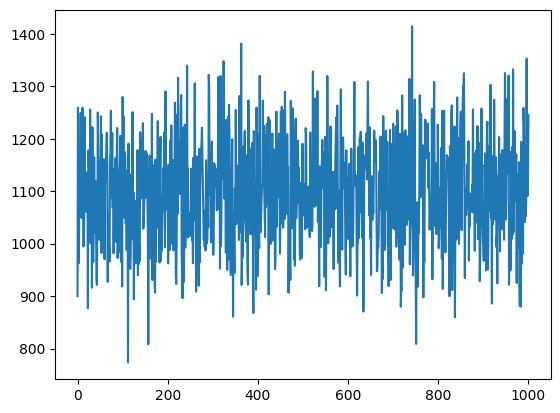

In [34]:
# For loop to run for the number of simulations desired
for i in range(num_simulations):
    balance = [900]
    num_rolls = [0]
    while num_rolls[-1] < max_num_rolls:
        iteration = roll_dice()
        # Obtiene el costo total
        costo_total = iteration[0] + iteration[1] + iteration[2] + iteration[3] +iteration[4] + iteration[5]
        balance.append(costo_total)
        num_rolls.append(num_rolls[-1] + 1)

# Graficar las muestras del balance
plt.plot(num_rolls, balance)

In [35]:
np.mean(balance)

1096.0987238067753

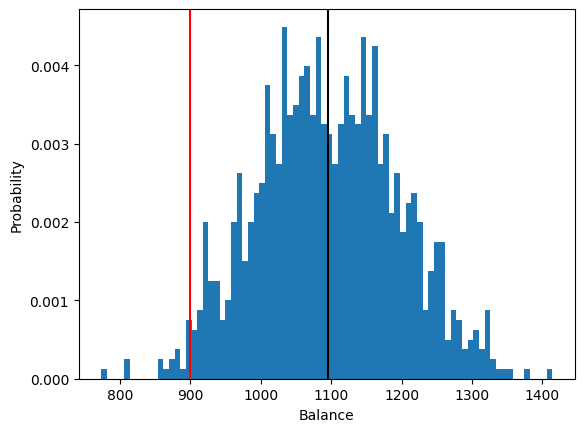

In [37]:
# Genera histograma del balance
np.random.seed(42)
plt.hist(balance, density=True, bins=80)
plt.ylabel('Probability')
plt.xlabel('Balance')
plt.axvline(np.mean(balance), color='k')
plt.axvline(costo_referencia, color='r')

In [38]:
print('Número de meustras: ', balance.__len__())
total_muestras = balance.__len__()

Número de meustras:  1001


In [40]:
# Genera una lista con las muestras menores al costo de referencia
costo_ok = [x for x in balance if x < costo_referencia]
costo_ok

[877.0142436144461,
 773.4760662980549,
 893.577488632158,
 808.2046732480517,
 895.9497324144402,
 860.9078415683268,
 867.6283785016151,
 870.5431021921372,
 879.6536651110315,
 808.900738746996,
 897.6231767077156,
 899.5621197798295,
 859.6066730384426,
 885.8354086784775,
 880.9438378673436,
 879.9087300166805]

In [42]:
num_costo_ok = costo_ok.__len__()
prob_costo_ref = num_costo_ok / total_muestras
print(f'La probabilidad de que el costo sea menor al costo de referencia es {prob_costo_ref * 100:.2f}%')

La probabilidad de que el costo sea menor al costo de referencia es 1.60%


In [46]:
# Percentiles 
for i in range(0, 100, 5):
    print(f'Percentil {i}% = {np.percentile(balance,i)}')

Percentil 0% = 773.4760662980549
Percentil 5% = 930.3964686188788
Percentil 10% = 967.9283384535779
Percentil 15% = 992.4640228282308
Percentil 20% = 1008.8765568672945
Percentil 25% = 1025.5243298344064
Percentil 30% = 1040.1536380956918
Percentil 35% = 1053.35734130025
Percentil 40% = 1065.6723872566583
Percentil 45% = 1079.4828879407614
Percentil 50% = 1093.0154840380874
Percentil 55% = 1110.177175707962
Percentil 60% = 1123.5655789132495
Percentil 65% = 1138.0359599363383
Percentil 70% = 1150.6440389203262
Percentil 75% = 1163.806187932181
Percentil 80% = 1180.6672779895846
Percentil 85% = 1203.0585042974553
Percentil 90% = 1225.123645613178
Percentil 95% = 1258.9814192525007
